In [16]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [17]:
from project_lib import Project
project=Project(None,"fdd9711f-93ac-4c2d-8bcd-fddc63ea3230","p-5c52c31a5729dae7e86d21ebaedfae333bcafc42")

In [22]:
train=project.get_file("train.csv")
meal=project.get_file("meal_info.csv")
fulfilment=project.get_file("fulfilment_center_info.csv")

In [23]:
df=pd.read_csv(train)
df1=pd.read_csv(meal)
df2=pd.read_csv(fulfilment)
df=pd.merge(df,df1,on="meal_id")
df=df_raw=pd.merge(df,df2,on="center_id")

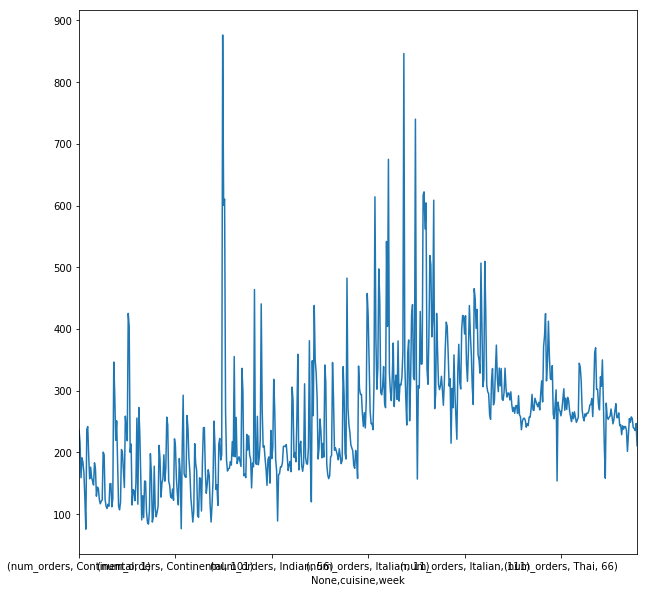

In [24]:
df_plot= df.groupby(['week','cuisine']).agg({'num_orders':'mean'})
df_plot = df_plot.unstack()
df_plot.loc[:].unstack().plot(figsize=(10,10))

In [25]:
dfg = df.groupby(["week"]).agg({'num_orders' : 'sum', 'op_area' : 'mean'})
dfg

,num_orders,op_area
week,,
1,792261,4.079877
2,787084,4.085014
3,695262,4.078682
4,743529,4.087747
5,1198675,4.077824
6,947288,4.084294
7,934803,4.093023
8,670518,4.096447
9,723243,4.080413


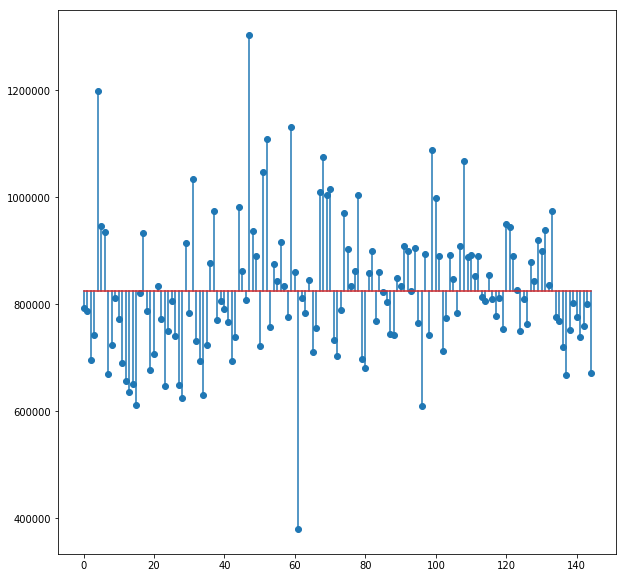

In [32]:
from matplotlib import figure
plt.pyplot.figure(figsize=(10,10))
ax2 = plt.pyplot.stem(dfg['num_orders'],label='weekly orders',bottom = dfg.num_orders.mean())

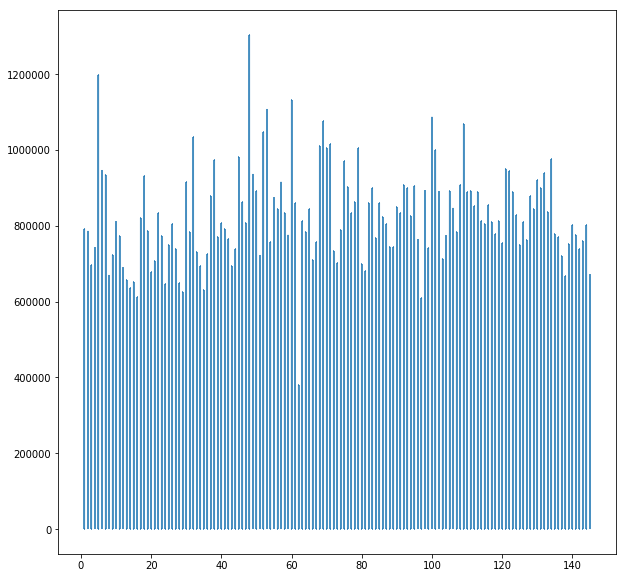

In [34]:
plt.pyplot.figure(figsize=(10,10))
ax3 = plt.pyplot.violinplot(dfg)

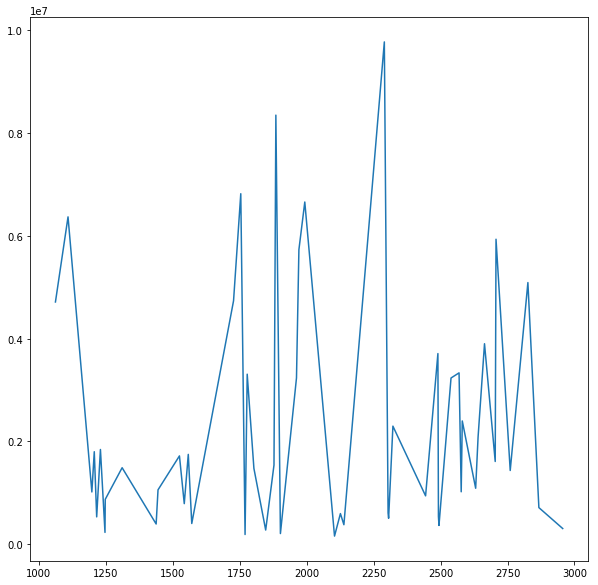

In [36]:
dfmid = df.groupby(["meal_id"]).agg({'num_orders' : 'sum'})
plt.pyplot.figure(figsize=(10,10))
plt.pyplot.plot(dfmid.index, dfmid.num_orders, )

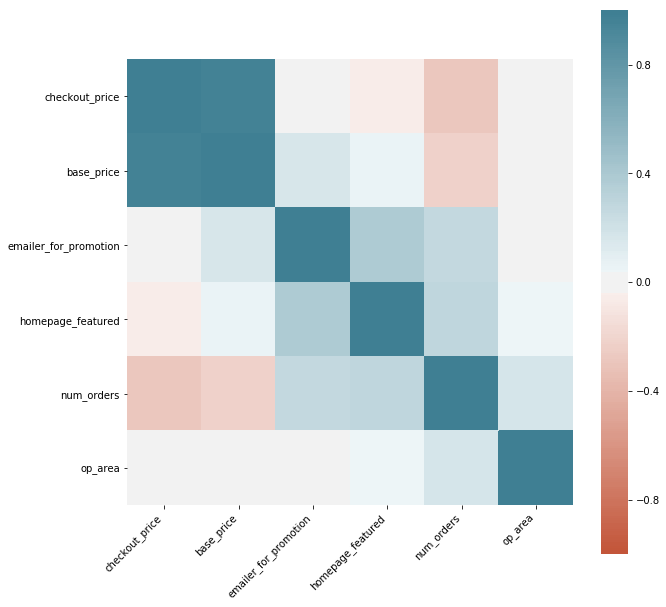

In [38]:
plt.pyplot.figure(figsize=(10,10))
dfsns = df.drop(columns=["center_id","meal_id","region_code","city_code","center_type","id","week"])
corr = dfsns.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);